In [1]:
import array_calculus as ac
import numpy as np
import test_array_calculus as ta

## Classwork 5: Derivatives as a Matrix

Trevor Kling

#### Introduction/Motivation

The derivative of some function $f$ can be defined as the limit of that same function as an arbitrary $dx$ approaches 0:
$$f'(x) = \frac{df}{dx}(x) = Df(x) \equiv \lim_{dx \to 0} \frac{f(x+dx) - f(x)}{(x + dx) - x} = \lim_{dx\to 0} \frac{f(x) - f(x - dx)}{x - (x - dx)} = \lim_{dx \to 0} \frac{f(x+dx) - f(x-dx)}{(x+dx)-(x-dx)}$$
The three equations above are called the forward difference, the backward difference, and the centeral difference respectively.  For the purposes of approximating a derivative, the central difference provides the most accurate approximations for some value of $dx$.  More interestingly, these functions can be defined as matrices.  Assuming some constant spacing given by $dx$, all values of $f$ over some domain $[a, b)$, the set of all values of $f$ can be written as
$$ S_f = \{f(n \, dx) \ | 0 \leq n < \frac{b - a}{dx} \} $$
This can be thought of as a row vector, where the index of the term is equal to the value of $n$.  Therefore, we can write the derivative of $f$ also as a row vector.  To produce that row vector, the operation given by the definition of a derivative is used, with the choice of which specific variation of the formula depending on the location of the values.

For the beginning edge:
$$ Df(x) = \frac{f(dx) - f(0)}{dx} $$
For center values:
$$ Df(x) = \frac{f((n+1)dx) - f((n-1)dx)}{2dx}$$
And finally, for the ending edge:
$$ Df(x) = \frac{f(\frac{b - a}{dx}dx) - f(((\frac{b - a}{dx})-1)dx)}{dx} $$
These values can then be encoded in a matrix, such that $\nabla \cdot S_f$ produces the full set of derivatives:
$$\nabla = \frac{1}{dx}\begin{bmatrix} -1 & -0.5 & 0 & \dots & 0 & 0 & 0 \\
                                        1 & 0 & -0.5 & \dots & 0 & 0 & 0 \\
                                        0 & 0.5 & 0 & \dots & 0 & 0 & 0 \\
                                        0 & 0 & 0.5 & \dots & 0 & 0 & 0 \\
                                        \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
                                        0 & 0 & 0 & \dots & -0.5 & 0 & 0 \\
                                        0 & 0 & 0 & \dots & 0 & -0.5 & 0 \\
                                        0 & 0 & 0 & \dots & 0.5 & 0 & -1 \\
                                        0 & 0 & 0 & \dots & 0 & 0.5 & 1 \\
                                        \end{bmatrix}$$
In this module, this specific method of interpreting a derivative is used to compute the derivatives of several functions.

In [2]:
def func1(x): return x**2
def func2(x): return np.sin(x)
def func3(x): return (np.exp((-x**2)/2)/np.sqrt(2*np.pi))

xs = np.arange(0, 10, 0.01)

The set of functions to be used are defined here.  They are $func1(x) = x^2$, $func2(x) = \sin(x)$, and $func3(x) =\frac{\exp(-x^2/2)}{\sqrt{2\pi}}$ respectively, and each will be computed over the range $[0, 10)$ with $dx=0.01$.  The array_calculus algorithm subsequently takes in an argument of some range $x$ and then returns the corresponding gradient matrix $\nabla$.  This is then applied to the set of $f(x)$ values via matrix multiplication, and the resulting values are graphed for analysis.

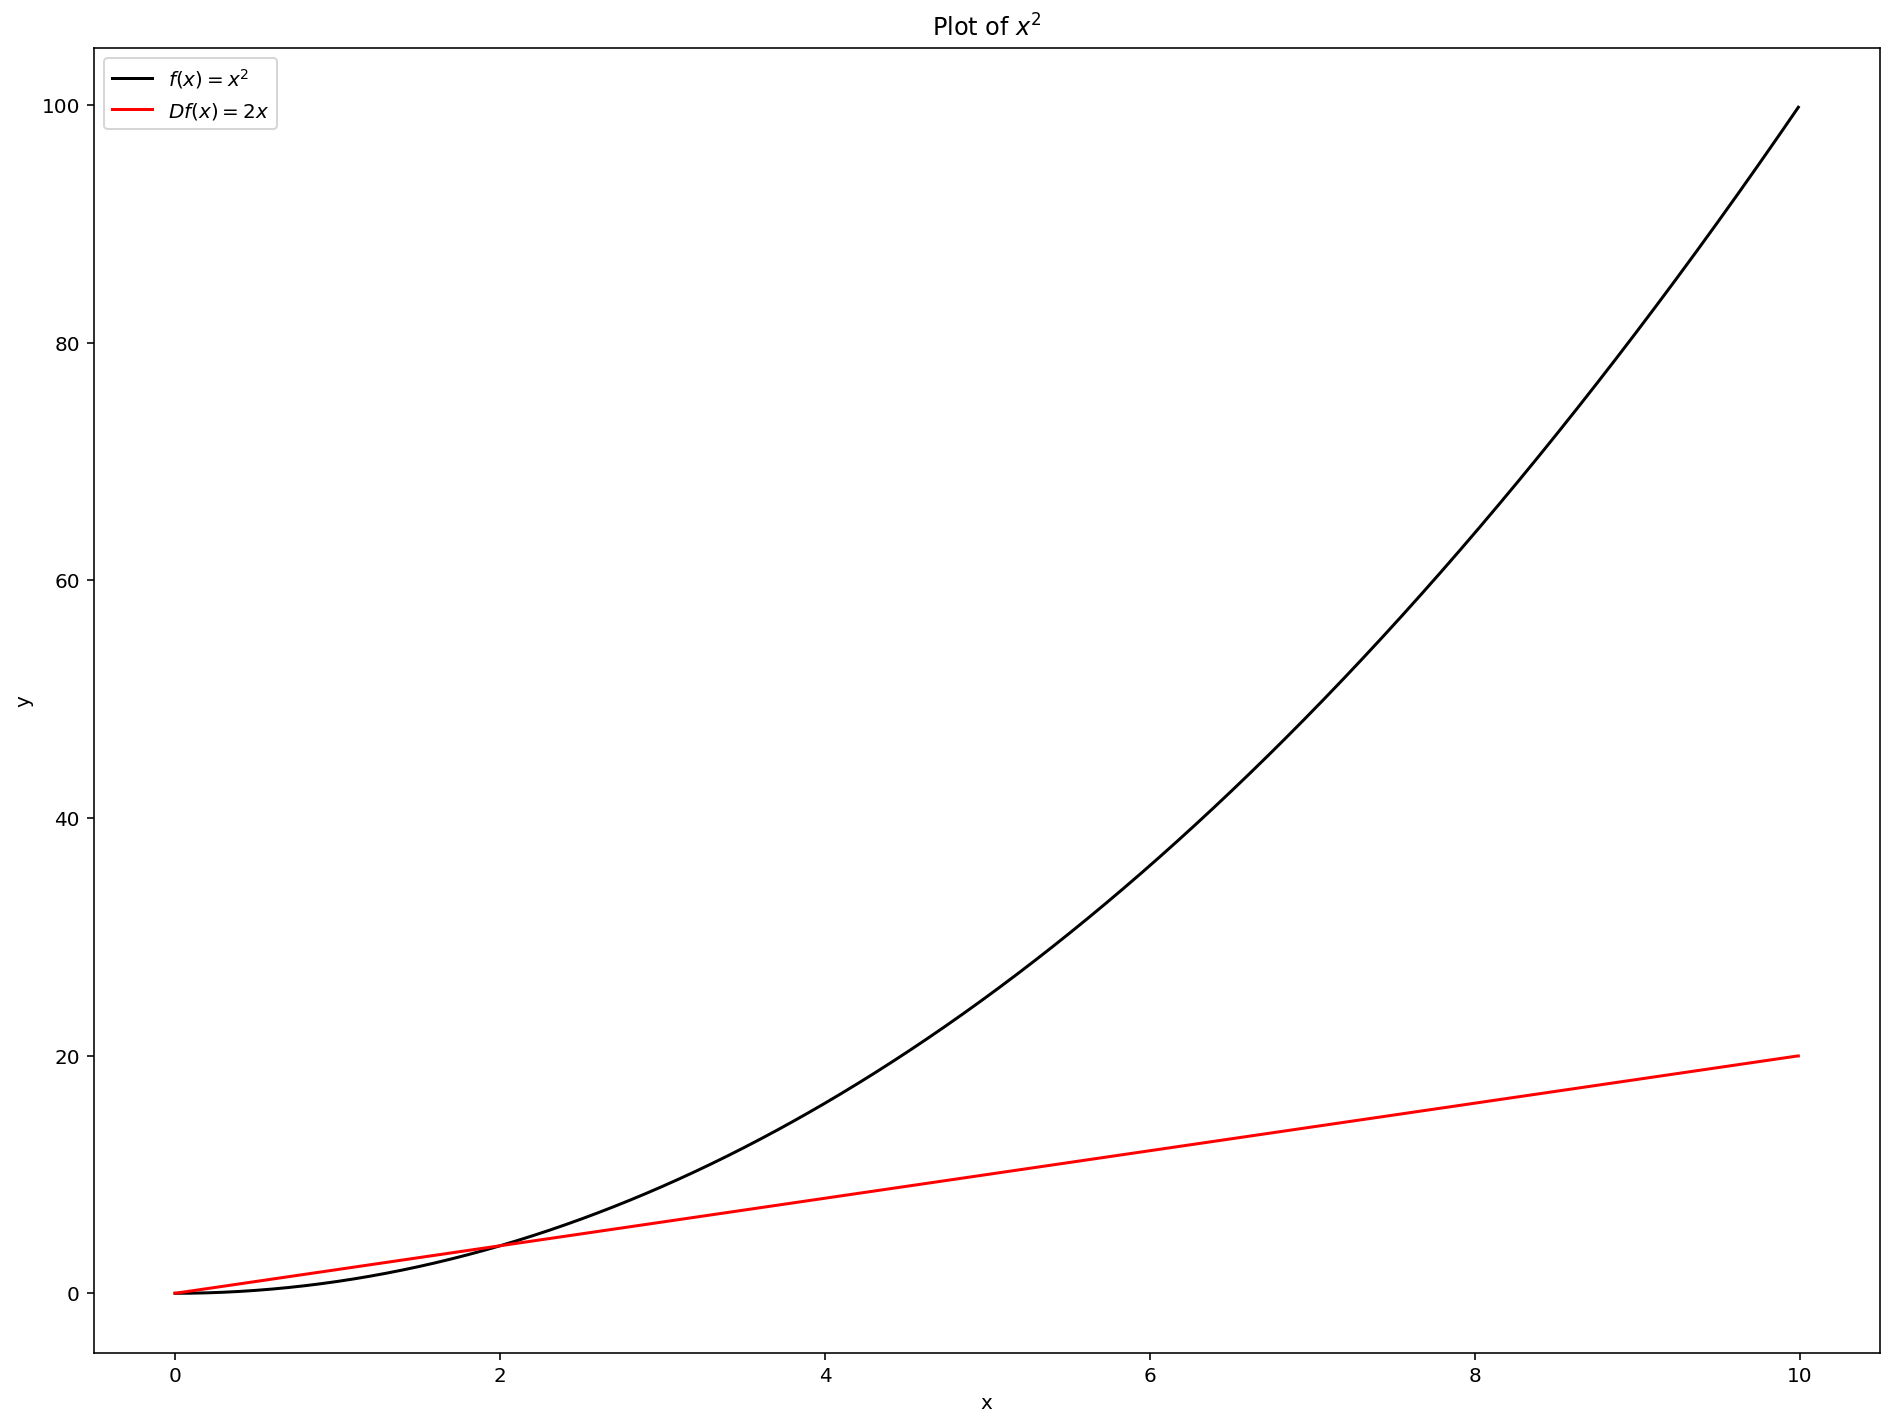

In [3]:
ac.plot(xs, func1, "$x^2$", "$2x$")

#### Function 1

The first function is a simple $x^2$ function.  The derivative of this function is known to be $2x$, and therefore the graph of the derivative forms a straight line. Additionally, the graph of the derivative and the graph of the original function cross at $x=2$, as $2^2 = 2 \cdot 2 = 4$.  While this case is certainly trivial to compute, it demonstrates the correctness of the matrix-based implementation effectively as the function $Df$ it produces is exactly what would be expected.

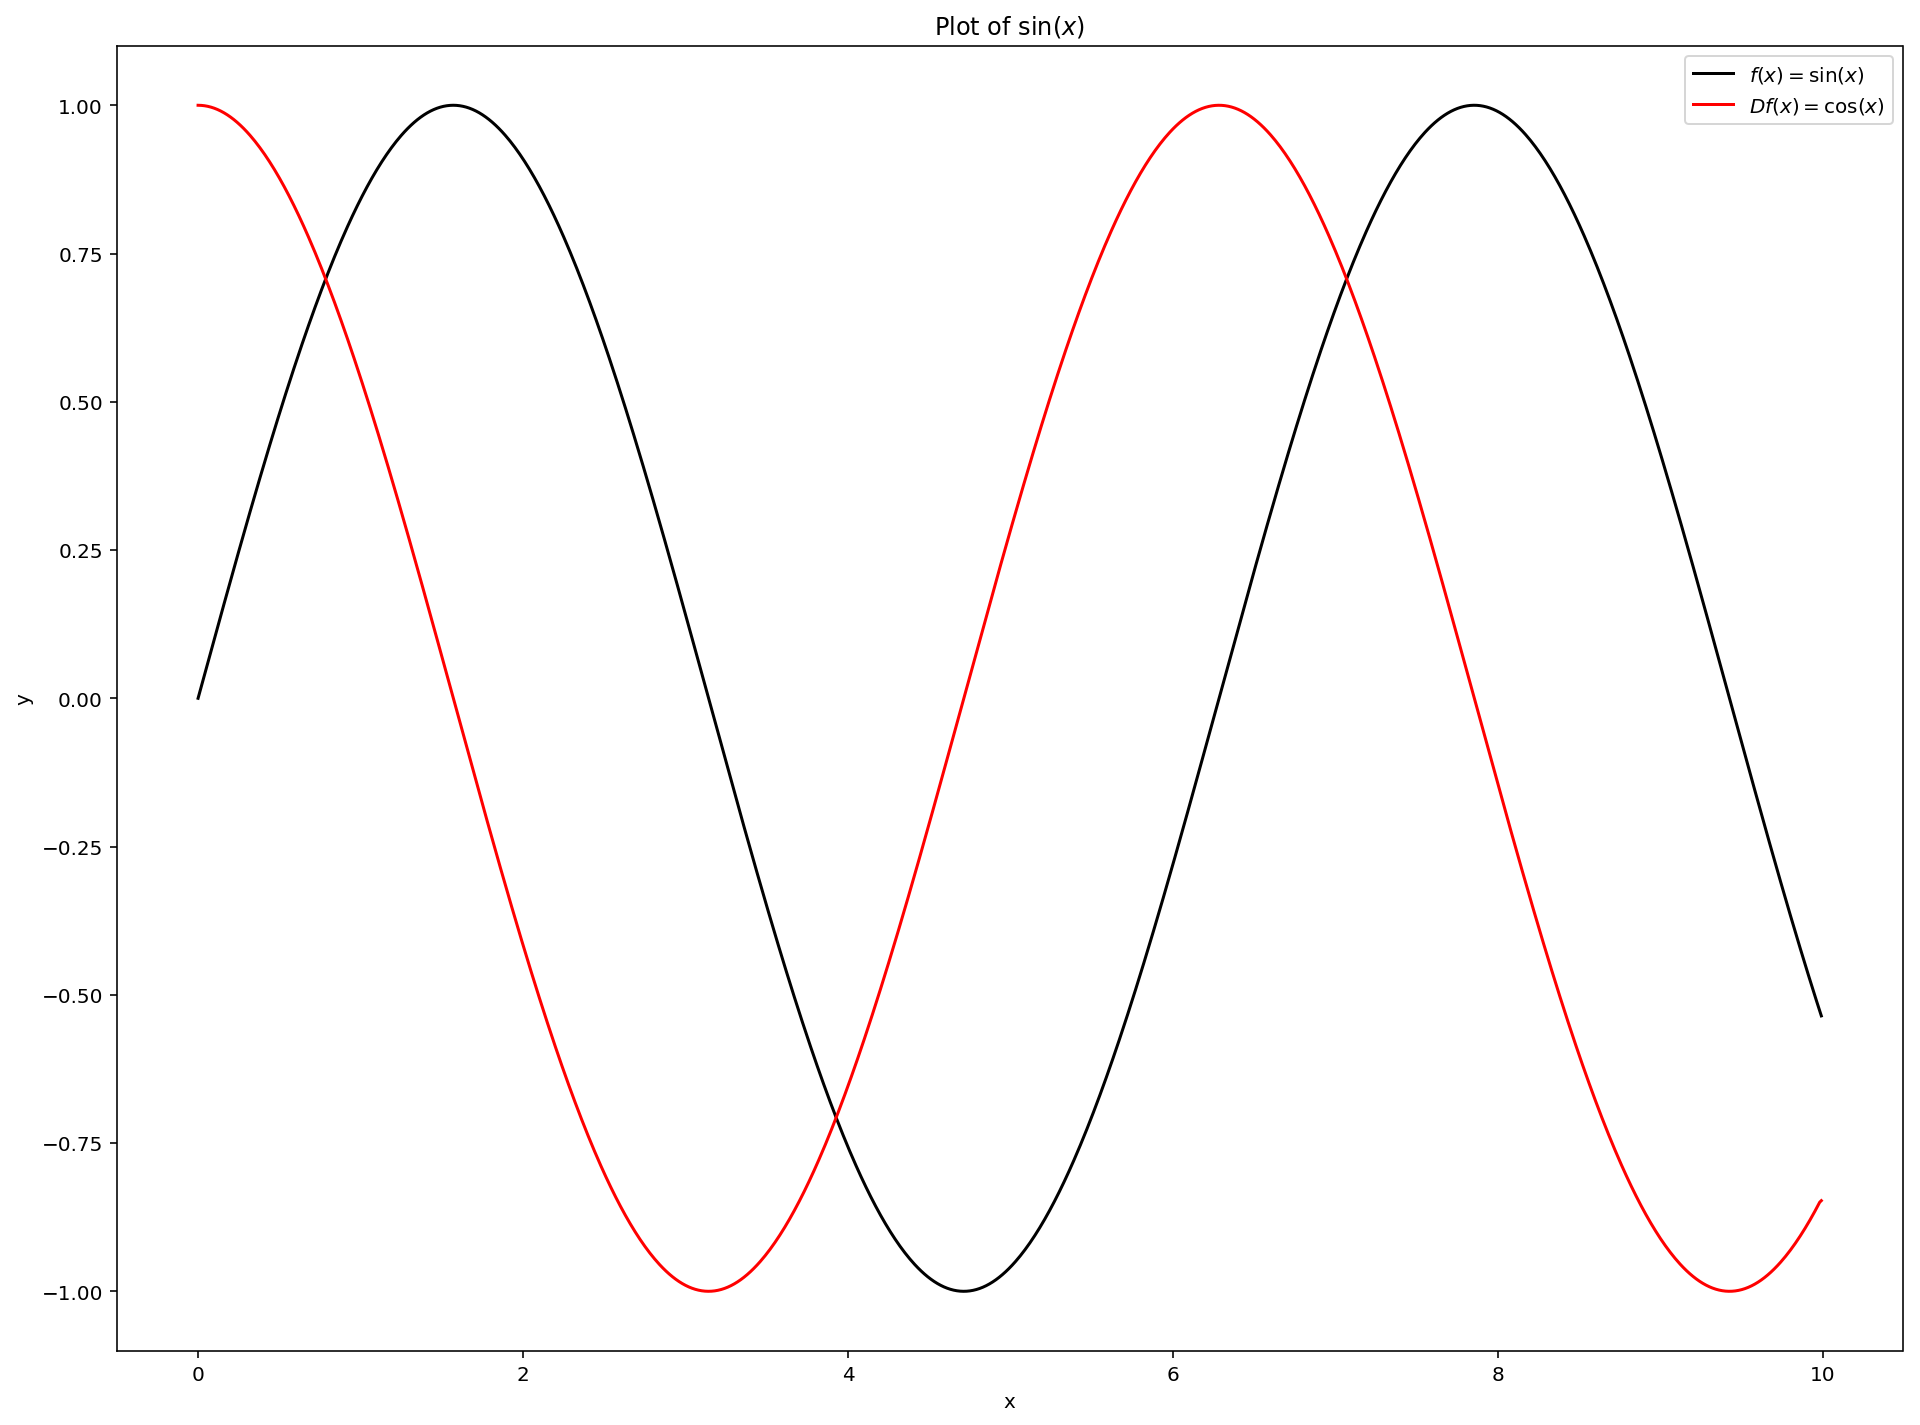

In [4]:
ac.plot(xs, func2, "$\sin(x)$", "$\cos(x)$")

#### Function 2

Function 2 sees the computation of the derivative of a sine function.  Sine is of particular interest, as its derivative is simply a cosine function.  This means that the implementation of $Df$ cannot depend on the function becoming "simpler" when the derivative is taken, as each of these two functions features the same number of points.  However, from the graph it can clearly be seen that the function $Df$ forms a cosine wave.  The graph of the derivativeis exactly a phase shift of the graph of $f(x)$, as it should be for the derivative of sine.

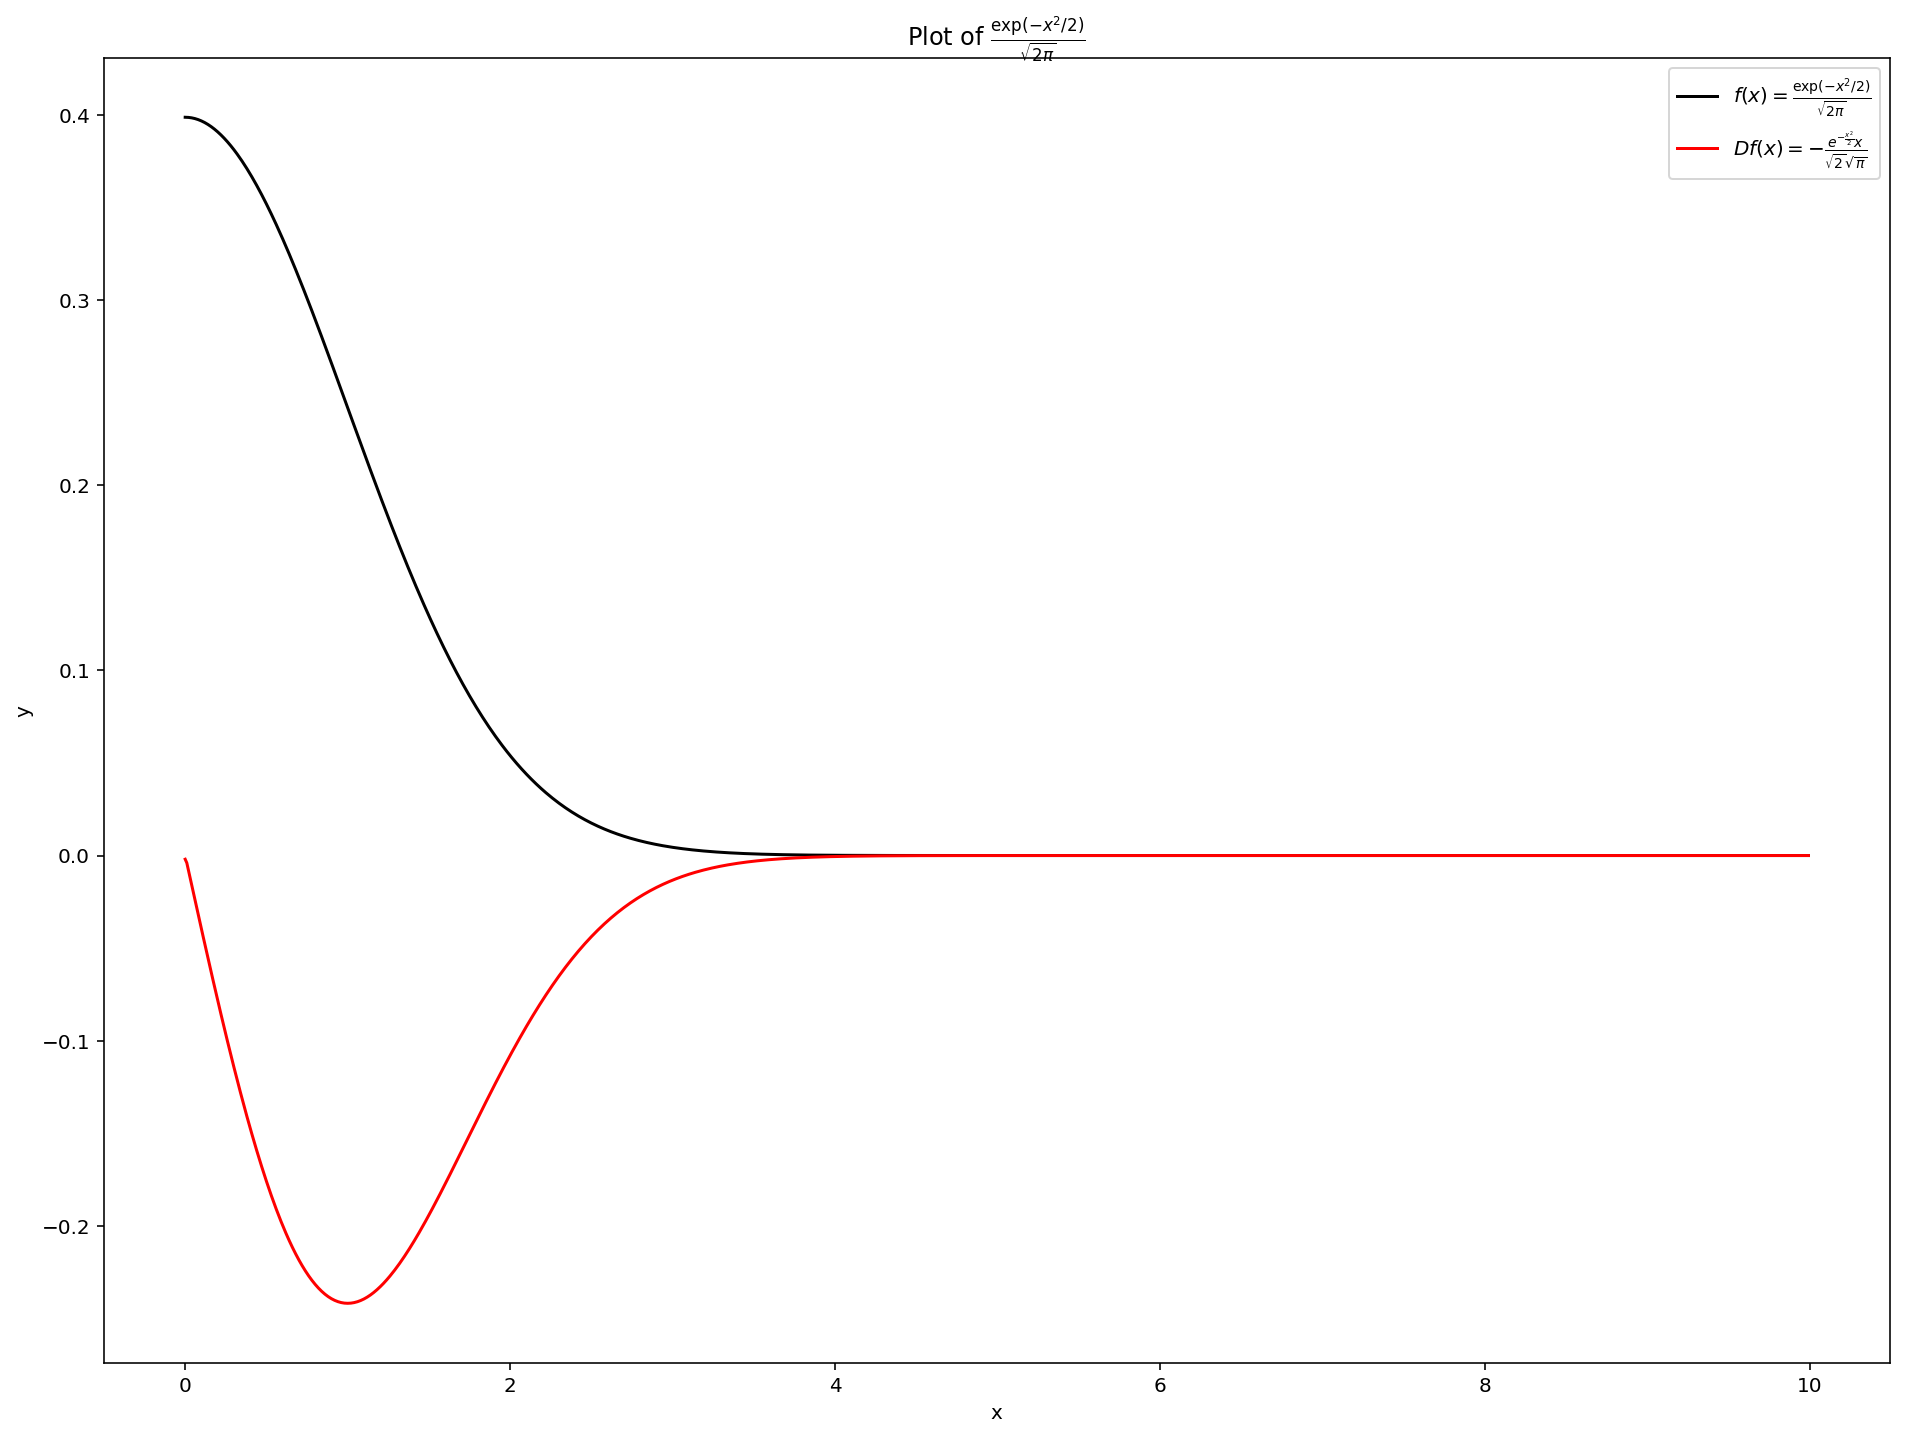

In [5]:
ac.plot(xs, func3, "$\\frac{\exp(-x^2/2)}{\sqrt{2\pi}}$", "$-\\frac{e^{-\\frac{x^2}{2}}x}{\sqrt{2}\sqrt{\pi }}$")

#### Function 3

The final function graphed using this method is a much more complicated one, which shows an exponential converging to 0.  For this case, the derivative is of particular interest as it converges to 0 at the same rate as the original function.  However, the derivative can be seen to be accurate with simple visual analysis; as the slope of the funciton decreases, the derivative drops, and when the slope increases back toward 0, so does the derivative.

#### Gradient as a Numpy Function

A final object of interest is the built-in "gradient" function in numpy.  This function computes the entire derivative given the function, while the previous implementation generates a matrix via some xs.

In [6]:
func1Gen = np.vectorize(func1)
funcVals = func1Gen(xs)
print((np.gradient(funcVals, 0.01))[:10])

[0.01 0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


In [7]:
print((funcVals @ ac.gradient(xs))[:10])

[0.01 0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


The two functions produce exactly the same values.  Both correctly find the gradient of a given function, but with different inputs.  The numpy gradient function takes an input of function values and the spacing, while the self-implemented function defines the gradient matrix and finds the actual gradient by matrix multiplication.

#### Second Order Derivative

Another brief interesting question is whether the matrix produced by ac.gradient squared forms the second derivative.  To test this, the first function will be used.  The value of the second derivative for the first equation is a constant 2, which can easily be seen from the equations.

In [8]:
print((funcVals @ (ac.gradient(xs)**2))[:10])

[ 1.   1.   2.5  5.   8.5 13.  18.5 25.  32.5 41. ]


This function does *not* appear to allow for the squaring of the matrix to produce the next derivative.  This is due to the spacing between values no longer being exactly $0.01$; it certainly is for the first two values, but it quickly diverges from this spacing.  In order to account for this, a matrix would need to be redefined such that it is not dependant on the spacing of the values being $n \, dx$.